# Data Structures and Algorithms



In [1]:
import numpy as np
import pandas as pd

## GlassDoor

### Draw from distribution

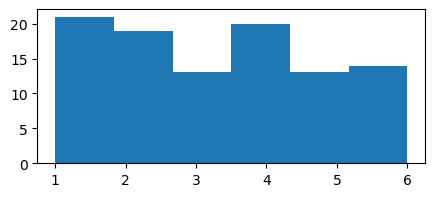

In [ ]:
import random
import matplotlib.pyplot as plt

rng = random.Random(44)

list_array = []
for _ in range(1,101):
    list_array.append( np.floor(rng.uniform(1,7)) )

fig, ax = plt.subplots(figsize=(5,2))
ax.hist(list_array, bins=6);



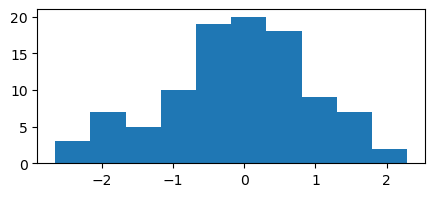

In [ ]:
np.random.seed(2)

list_array = []
for _ in range(0,100):
    list_array.append(np.random.normal(0,1))

fig, ax = plt.subplots(1,1,figsize=(5,2))
ax.hist(list_array);


### Split a string

In [ ]:
string = 'The quick brown fox jumps over the lazy dog'

word = []
sentence = []

for i in range(0,len(string)):
    letter = string[i] # space reached
    if letter == ' ':
        sentence.append(''.join(word))
        word = []
    if i == len(string)-1: # last letter of string
        word.append(letter)
        sentence.append(''.join(word))
    else:
        word.append(letter)

print(sentence)


['The', ' quick', ' brown', ' fox', ' jumps', ' over', ' the', ' lazy', ' dog']


### Square root

In [13]:
def square_root(number):
    if number < 0:
        return "Negative"
    
    x_old = number

    while True:
        x_new = 0.5 * (x_old + number/x_old)
        if abs(x_old - x_new) < 1e-4:
            break
        x_old = x_new

    return x_new


In [14]:
square_root(8)

2.8284271250498643

### Combinations that sum to x

In [25]:
def sum_to_x(integers, target):
    pairs = []
    for i in range(0, len(integers)):
        a = integers[i]

        for j in range(i+1, len(integers)):
            b = integers[j]

            if a+b == target:
                pairs.append((a,b))

    return pairs

In [40]:
def sum_to_x_2pointers(integers,target):
    integers_sorted = sorted(integers)
    pairs = []
    i = 0
    j = len(integers_sorted)-1

    while i < j:
        curr_sum = integers_sorted[i] + integers_sorted[j]

        if curr_sum == target:
            pairs.append((integers_sorted[i],integers_sorted[j]))
            i += 1
            j -= 1
        elif curr_sum < target:
            i += 1
        elif curr_sum > target:
            j -= 1

    return pairs

In [37]:
integers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 8

In [27]:
sum_to_x(integers, target)

[(0, 8), (1, 7), (2, 6), (3, 5)]

In [41]:
sum_to_x_2pointers(integers, target)

[(0, 8), (1, 7), (2, 6), (3, 5)]

## Two Pointers

### Ex 1

Given a string s, return true if it is a palindrome, false otherwise.

In [42]:
def check_palindrom(s):
    left = 0
    right = len(s) - 1

    while left < right:
        if s[left] != s[right]:
            return False
        
        left += 1
        right -= 1

    return True

In [45]:
s = 'abcdcba'
s = 'racecar'
s = 'blah'

check_palindrom(s)

False

### Ex 2

Given a sorted array of unique integers and a target integer, return true if there exists a pair of numbers that sum to target, false otherwise. This problem is similar to Two Sum. (In Two Sum, the input is not sorted).

For example, given nums = [1, 2, 4, 6, 8, 9, 14, 15] and target = 13, return true because 4 + 9 = 13.

In [48]:
def sum_to_target(nums, target):
    left = 0
    right = len(nums) -1

    while left < right:
        curr_sum = nums[left] + nums[right]
        if curr_sum == target:
            return True
        elif curr_sum < target:
            left += 1
        elif curr_sum > target:
            right -= 1

    return False

In [49]:
nums = [1, 2, 4, 6, 8, 9, 14, 15]
target = 13

sum_to_target(nums, target)

True

### Ex 3

Given two sorted integer arrays arr1 and arr2, return a new array that combines both of them and is also sorted.

In [53]:
def combine_sort(arr1, arr2):
    ans = []
    p1 = p2 = 0

    while p1 < len(arr1) and p2 < len(arr2):
        if arr1[p1] < arr2[p2]:
            ans.append(arr1[p1])
            p1 += 1
        elif arr1[p1] > arr2[p2]:
            ans.append(arr2[p2])
            p2 += 1
        elif arr1[p1] == arr2[p2]:
            ans.append(arr1[p1])
            ans.append(arr2[p2])
            p1 += 1
            p2 += 1

    # When above loop finishes, at least one string has run out
    # Finish any remainder of strings if unequal length
    while p1 < len(arr1):
        ans.append(arr1[p1])
        p1 += 1

    while p2 < len(arr2):
        ans.append(arr2[p2])
        p2 += 1

    return ans

In [54]:
arr1 = [1, 4, 7, 20]
arr2 = [3, 5, 6]

combine_sort(arr1, arr2)

[1, 3, 4, 5, 6, 7, 20]

### Ex 3 - 392. Is Subsequence [E]

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a new string that is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (i.e., "ace" is a subsequence of "abcde" while "aec" is not).



In [62]:
# Beats 27.40%
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        i = j = 0

        while i < len(s) and j < len(t):
            if s[i] == t[j]:
                i += 1
                j += 1
            else:
                j += 1

        if i == len(s):
            return True
        else:
            return False
        
        


In [64]:
s = 'abc'
t = 'ahbgdc'
t = 'ahbgd'
sol = Solution
sol.isSubsequence(sol, s,t)

False